# Importing Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading CSV Files
train = pd.read_csv('../input/prostate-cancer-grade-assessment/train.csv')
test  = pd.read_csv('../input/prostate-cancer-grade-assessment/test.csv')

In [ ]:
print(test.shape)
test

In [ ]:
print(train.shape)
train[:3]

In [ ]:
print('Total samples       :',train.shape[0])
for i in train.columns:
  print("Total No. of Unique values in Column {}  : {}".format(i,len(train[i].unique())))
  if len(train[i].unique()) <20:
    print(train[i].unique())

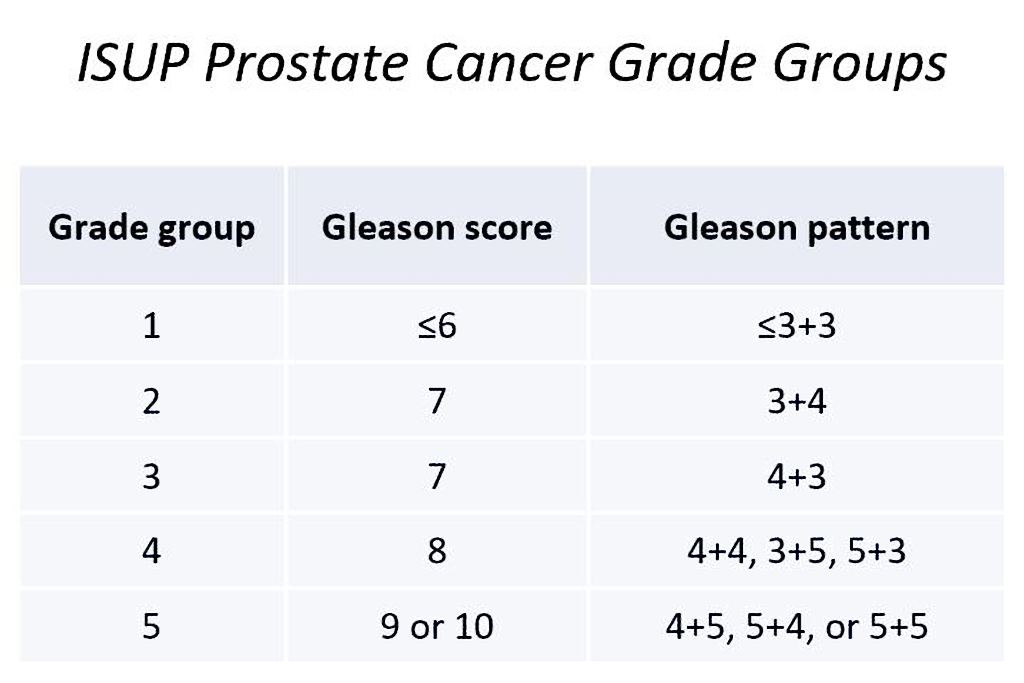

In [0]:
def gleason_to_grade(score):
  if score == 'negative' :
    return 0
  elif score in ['0+0','3+3']:
    return 1
  elif score in ['3+4']:
    return 2
  elif score in ['4+3']:
    return 3
  elif score in ['4+4', '5+3', '3+5']:
    return 4
  elif score in ['4+5', '5+5', '5+4']:
    return 5

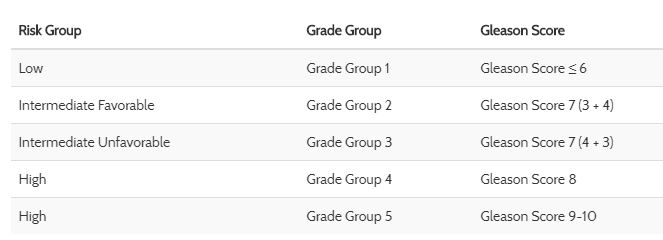![](http://)

From Above Image Gleason Score is seperated based in its score level.

The score below 6 is low --> Grade Group 1 & so on

In [ ]:
def risk_level(gleason_grade):
  if gleason_grade in [1]:
    return "Low"
  elif gleason_grade in [2]:
    return "Intermediate Favourable"
  elif gleason_grade in [3]:
    return "Intermediate Unfavourable"
  elif gleason_grade in [4,5]:
    return "High"  

In [0]:
train['gleason_score_grade'] = train['gleason_score'].apply(lambda x: gleason_to_grade(x))
train['gleason_Risk_Level'] = train['gleason_score_grade'].apply(lambda x: risk_level(x))

In [0]:
train_k = train[train['data_provider']== 'karolinska']
train_r = train[train['data_provider']== 'radboud']

# Visualization

In [ ]:
sns.countplot(train['data_provider'])

In [ ]:
sns.distplot(train['isup_grade'])

In [ ]:
sns.distplot(train['gleason_score_grade'])

In [ ]:
sns.countplot(train['gleason_score'])

In [ ]:
sns.countplot(train['gleason_Risk_Level'])